In [3]:
import pandas
import matplotlib.pyplot

In [4]:
df = pandas.read_csv('scores.csv')
df

,ID,arrival_rate_max,arrival_rate_mean,arrival_rate_min,arrival_rate_var,departure_rate_max,departure_rate_mean,departure_rate_min,departure_rate_var,speed_max,speed_mean,speed_min,speed_var,waiting_time_max,waiting_time_mean,waiting_time_min,waiting_time_var
0,ql-mono-default-p,10,1.702092,0,2.052124,16,1.703437,0,3.303254,14.413427,5.829288,0.0,11.268362,24138.382716,775.384327,0.0,1.119681e+07
1,ql-mono-default-dwt,10,1.810724,0,1.996578,16,1.810032,0,3.350744,15.760798,6.325818,0.0,9.419933,993.752381,45.903435,0.0,1.291596e+04
2,ql-mono-default-as,11,1.664076,0,1.952583,16,1.663663,0,2.905074,13.298192,2.601393,0.0,2.187460,1212.428571,83.009131,0.0,1.088202e+04
3,ql-mono-default-ql,10,1.840963,0,2.109658,16,1.840296,0,3.439285,15.855703,6.321952,0.0,9.566364,667.080357,37.262602,0.0,7.171456e+03


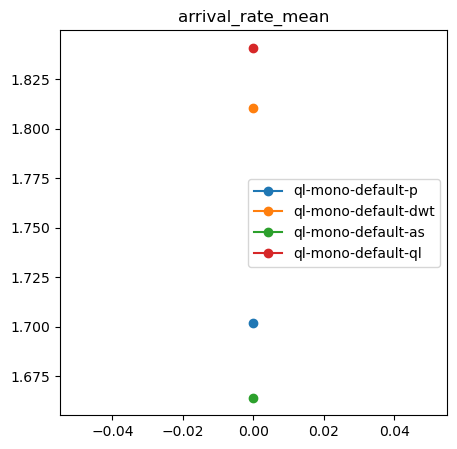

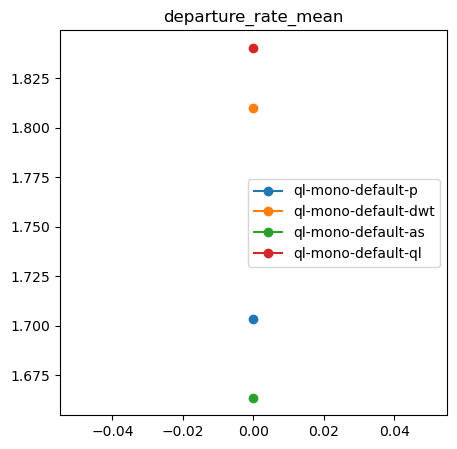

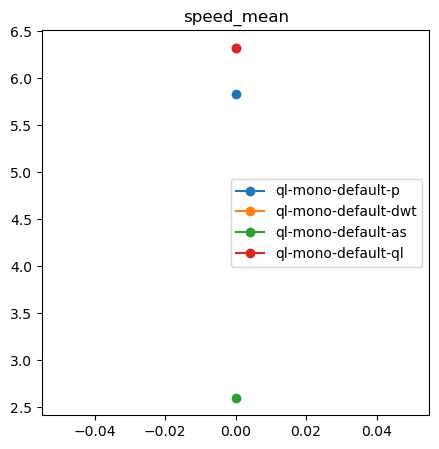

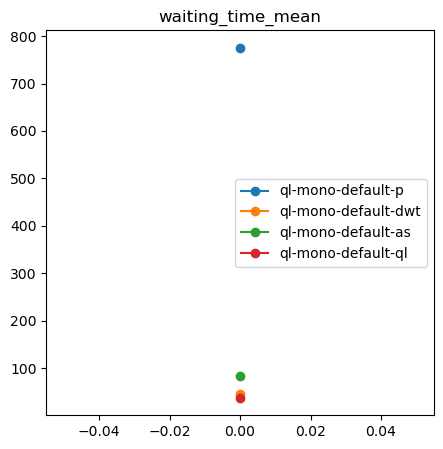

In [5]:
def plot_attributes(df: pandas.DataFrame, attributes: list[str]):
    for attribute in attributes:
        fig = matplotlib.pyplot.figure(figsize=(5, 5))
        for ID, value in zip(df['ID'], df[attribute]):
            matplotlib.pyplot.plot(value, label=ID, marker='o')
        matplotlib.pyplot.title(attribute)
        matplotlib.pyplot.legend()

plot_attributes(df, ['arrival_rate_mean', 'departure_rate_mean', 'speed_mean', 'waiting_time_mean'])

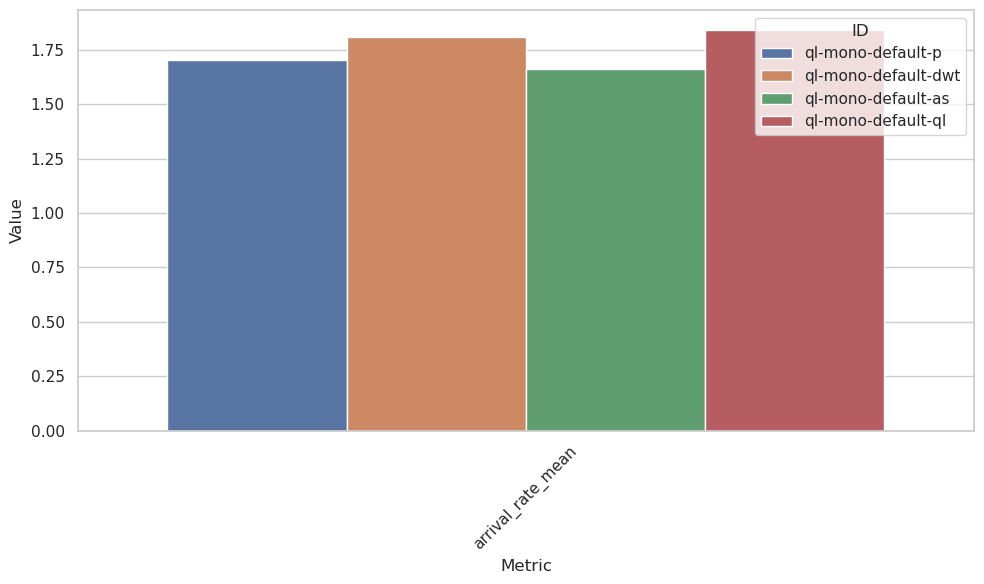

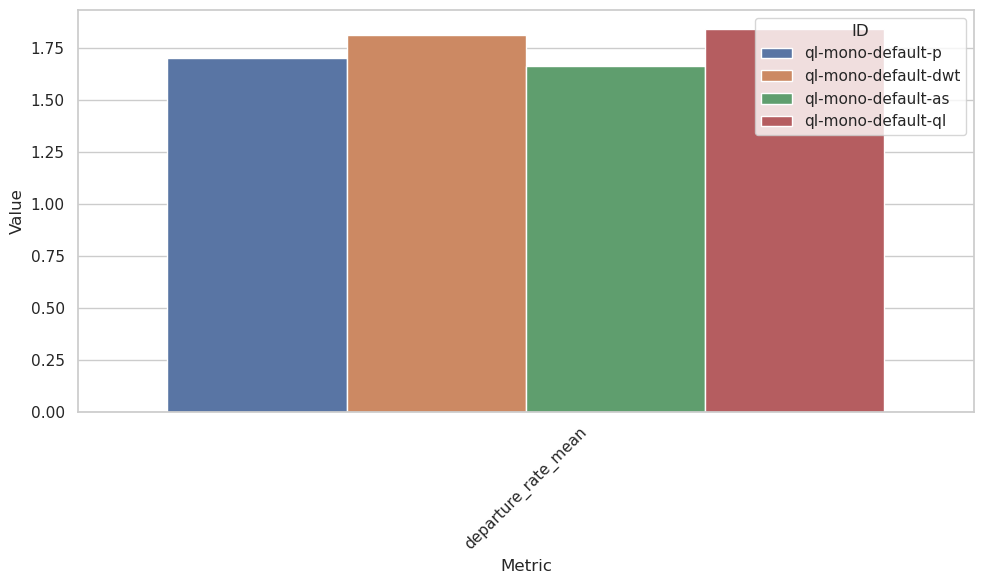

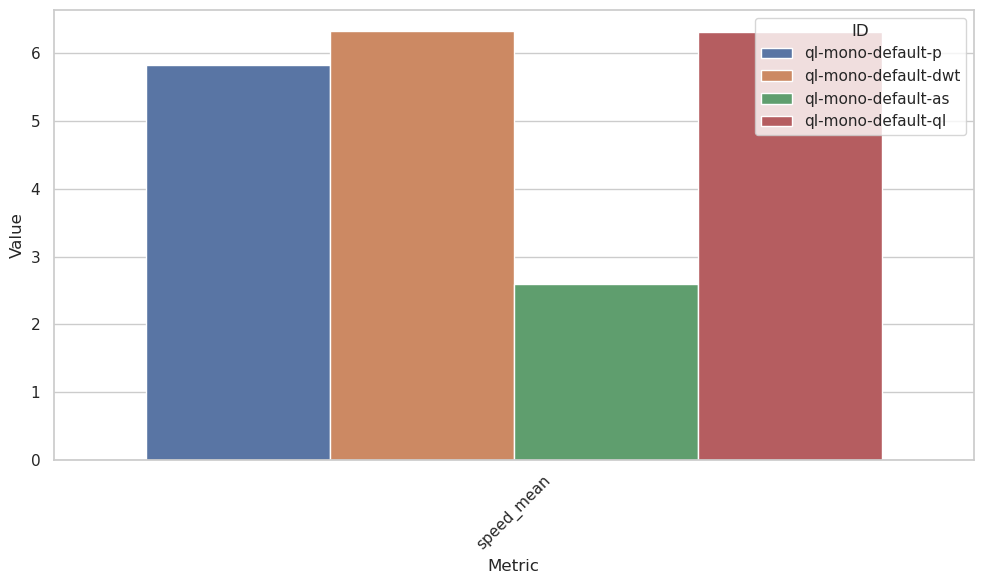

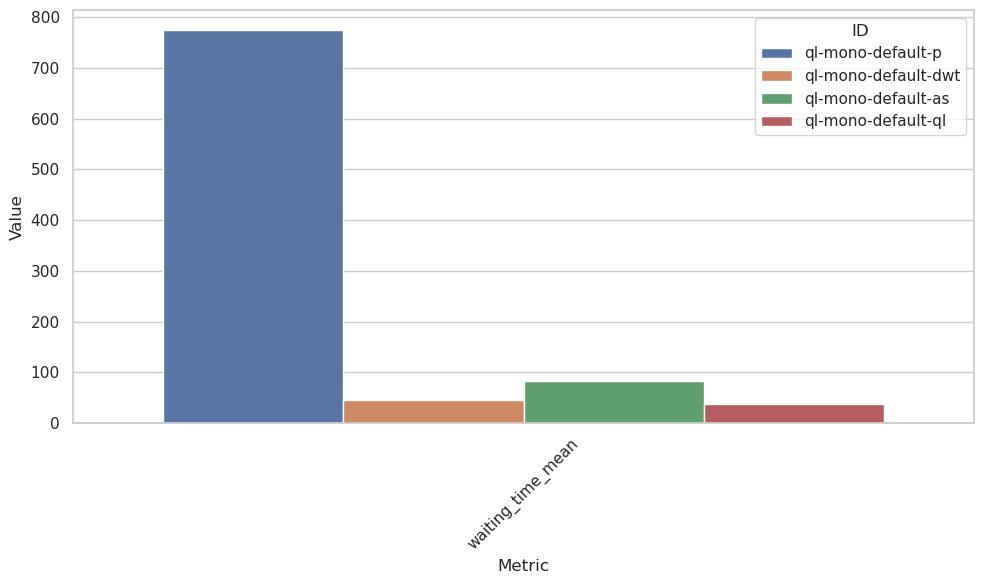

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot style
sns.set(style="whitegrid")

# Reshape data for plotting

for attribute in ['arrival_rate_mean', 'departure_rate_mean', 'speed_mean', 'waiting_time_mean']:
    df_melted = df[[attribute, 'ID']].melt(id_vars="ID", var_name='Metric', value_name="Value")
    # Create grouped bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_melted, x='Metric', y='Value', hue="ID")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [7]:
def fibonacci(nums: int) -> list[int]:
    if nums < 0:
        raise ValueError(nums)
    elif nums == 0:
        return []
    elif nums == 1:
        return [1]
    else:
        arr = [1, 2]
        for i in range(2, nums):
            arr.append(arr[-1] + arr[-2])
        return arr

def assign_points(objects: dict[str, dict], metric: str, higher_is_better: bool = True) -> dict:
    sorted_object_keys: list[str] = []
    if higher_is_better:
        sorted_object_keys = sorted(list(objects.keys()), key = lambda obj: objects[obj][metric])
    else:
        sorted_object_keys = sorted(list(objects.keys()), key = lambda obj: -objects[obj][metric])
    results = {}
    for idx, obj_points in enumerate(fibonacci(len(sorted_object_keys))):
        results[sorted_object_keys[idx]] = obj_points
    return results

def update_points(consolidated_points: dict, round_points: dict) -> dict:
    results = {}
    for obj_key, obj_points in round_points.items():
        results[obj_key] = (consolidated_points.get(obj_key) or 0) + round_points[obj_key]
    return results

def leaderboard(objects: dict, metrics: list[tuple[str, bool]]) -> dict:
    results = {}
    for (metric, higher_is_better) in metrics:
        round_points = assign_points(objects, metric, higher_is_better)
        print(round_points)
        results = update_points(results, round_points)
    return results

In [8]:
def read_objects(df: pandas.DataFrame) -> dict:
    objects = {}
    for idx, row in df.iterrows():
        objects[row['ID']] = {
            metric: row[metric]
            for metric in ['arrival_rate_mean', 'departure_rate_mean', 'speed_mean', 'waiting_time_mean']
        }
    return objects

In [9]:
leaderboard(read_objects(df), [
    ('arrival_rate_mean', True),
    ('departure_rate_mean', True),
    ('speed_mean', True),
    ('waiting_time_mean', False)
])

{'ql-mono-default-as': 1, 'ql-mono-default-p': 2, 'ql-mono-default-dwt': 3, 'ql-mono-default-ql': 5}
{'ql-mono-default-as': 1, 'ql-mono-default-p': 2, 'ql-mono-default-dwt': 3, 'ql-mono-default-ql': 5}
{'ql-mono-default-as': 1, 'ql-mono-default-p': 2, 'ql-mono-default-ql': 3, 'ql-mono-default-dwt': 5}
{'ql-mono-default-p': 1, 'ql-mono-default-as': 2, 'ql-mono-default-dwt': 3, 'ql-mono-default-ql': 5}


{'ql-mono-default-p': 7,
 'ql-mono-default-as': 5,
 'ql-mono-default-dwt': 14,
 'ql-mono-default-ql': 18}